In [10]:
import os
import copy
import time
import random
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.io
import matplotlib.pyplot as plt
import glob
import re
from datetime import datetime
from dateutil import parser
import dateutil.parser
from scipy.io import savemat

import numpy as np
import scipy.misc
import numpy.random as rng
from PIL import Image, ImageDraw, ImageFont
from sklearn.utils import shuffle
import nibabel as nib #reading MR images
import math
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr


from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

In [11]:
DATASET = 'Dataset2.0.csv'

Pearson Lipid Correlations

In [33]:
dataset = pd.read_csv(DATASET)
pearson_cor = pd.DataFrame()
dataset['Sex'] = dataset['Sex'].replace({'M': 1, 'F': 0})
dataset = dataset.drop(columns=['RID','VISCODE','VISCODE2', 'Group', 'MRI_Date', 'Exam_Date'])
pearson_cor['Feature'] = None
pearson_cor['LHC_ICV'] = None
pearson_cor['RHC_ICV'] = None
listaL = dataset['LHC_ICV']
listaR = dataset['RHC_ICV']
lista1 = []
lista2 = []
lista3 = []
lista = []
for i in dataset.columns[48:828 + 1]:
    lista1.append(i)
    lista = []
    lista = dataset[i]
    corrL, _ = pearsonr(lista,listaL)
    corrR, _ = pearsonr(lista,listaR)
    lista2.append(corrL)
    lista3.append(corrR)
pearson_cor['Feature'] = lista1
pearson_cor['LHC_ICV'] = lista2
pearson_cor['RHC_ICV'] = lista3
pearson_cor = pearson_cor.sort_values(by='LHC_ICV')
display(pearson_cor)


                           Feature   LHC_ICV   RHC_ICV
716             TG.52.4...NL.16.1. -0.191813 -0.191624
467                LPE.20.4...SN1. -0.184160 -0.157094
468                LPE.20.4...SN2. -0.171403 -0.147895
714             TG.52.3...NL.16.1. -0.170265 -0.172150
595                       AC.18.0. -0.162169 -0.153938
..                             ...       ...       ...
144  SM.D18.1.23.0..SM.D17.1.24.0.  0.170563  0.147976
434                PE.P.18.0.22.6.  0.174298  0.163382
419                PE.P.16.0.22.6.  0.203748  0.197590
121                       SM.41.0.  0.214847  0.202549
137                 SM.D18.0.22.0.  0.220817  0.217195

[781 rows x 3 columns]


Spearmann Lipid Correlations

In [36]:
dataset = pd.read_csv(DATASET)
spearman_cor = pd.DataFrame()
dataset['Sex'] = dataset['Sex'].replace({'M': 1, 'F': 0})
dataset = dataset.drop(columns=['RID','VISCODE','VISCODE2', 'Group', 'MRI_Date', 'Exam_Date'])
spearman_cor['Feature'] = None
spearman_cor['LHC_ICV'] = None
spearman_cor['RHC_ICV'] = None
listaL = dataset['LHC_ICV']
listaR = dataset['RHC_ICV']
lista1 = []
lista2 = []
lista3 = []
lista = []

for i in dataset.columns[48:828 + 1]:
    lista1.append(i)
    lista = []
    lista = dataset[i]
    corrL, _ = spearmanr(lista,listaL)
    corrR, _ = spearmanr(lista,listaR)
    lista2.append(corrL)
    lista3.append(corrR)

spearman_cor['Feature'] = lista1
spearman_cor['LHC_ICV'] = lista2
spearman_cor['RHC_ICV'] = lista3

spearman_cor_LHC = spearman_cor.sort_values(by='LHC_ICV')
spearman_cor_RHC = spearman_cor.sort_values(by='RHC_ICV')

display(spearman_cor_LHC)
display(spearman_cor_RHC)

,Feature,LHC_ICV,RHC_ICV
716,TG.52.4...NL.16.1.,-0.192629,-0.186064
467,LPE.20.4...SN1.,-0.178615,-0.159156
344,LPC.O.22.1.,-0.177985,-0.167662
342,LPC.O.20.1.,-0.175922,-0.163274
295,LPC.18.1...SN1.,-0.171335,-0.149483
...,...,...,...
434,PE.P.18.0.22.6.,0.163529,0.154031
144,SM.D18.1.23.0..SM.D17.1.24.0.,0.166776,0.153149
419,PE.P.16.0.22.6.,0.187909,0.184206
121,SM.41.0.,0.200543,0.189932


,Feature,LHC_ICV,RHC_ICV
716,TG.52.4...NL.16.1.,-0.192629,-0.186064
105,GM3.D18.1.24.1.,-0.153616,-0.168840
344,LPC.O.22.1.,-0.177985,-0.167662
342,LPC.O.20.1.,-0.175922,-0.163274
714,TG.52.3...NL.16.1.,-0.165272,-0.163040
...,...,...,...
144,SM.D18.1.23.0..SM.D17.1.24.0.,0.166776,0.153149
434,PE.P.18.0.22.6.,0.163529,0.154031
419,PE.P.16.0.22.6.,0.187909,0.184206
121,SM.41.0.,0.200543,0.189932


# Plots

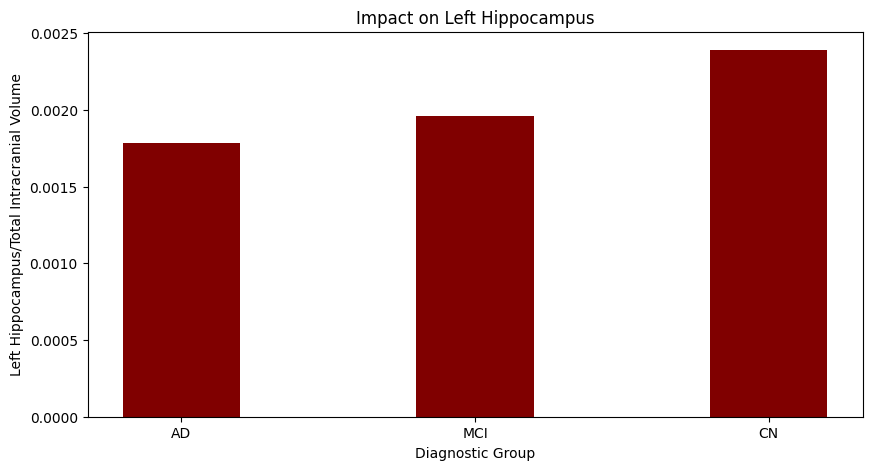

In [18]:
dataset = pd.read_csv(DATASET)
data1 = dataset['Left-Hippocampus']
data2 = dataset['Group']
fig = plt.figure(figsize = (10, 5))
data = pd.DataFrame()
ad,mci,cn = 0,0,0
c1,c2,c3 = 0,0,0,
for index, row in dataset.iterrows():
    if row['Group'] == 'AD': 
        ad+= row['LHC_ICV']
        c1+=1
    elif row['Group'] == 'MCI': 
        mci+= row['LHC_ICV']
        c2+=1
    elif row['Group'] == 'CN': 
        cn+= row['LHC_ICV']
        c3+=1
data = {'Group':['AD','MCI','CN'],
        'Mean Ratio':[(ad/c1),(mci/c2),(cn/c3)]}

# creating the bar plot
plt.bar(data['Group'], data['Mean Ratio'], color ='maroon', 
        width = 0.4)
 
plt.xlabel("Diagnostic Group")
plt.ylabel("Left Hippocampus/Total Intracranial Volume")
plt.title("Impact on Left Hippocampus")
plt.show()

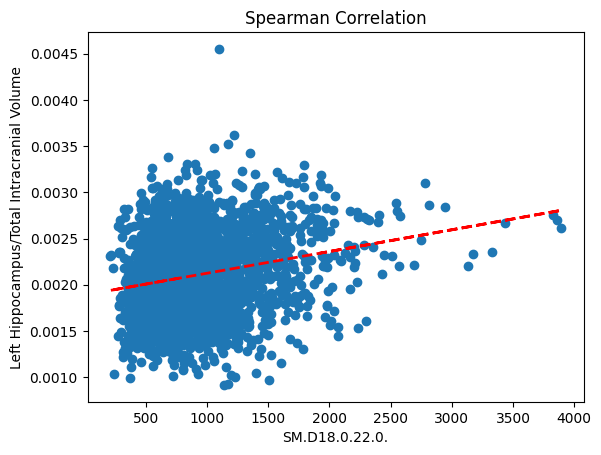

In [10]:
dataset = pd.read_csv(DATASET)
plt.scatter(dataset['SM.D18.0.22.0.'], dataset['LHC_ICV'])
a,b = np.polyfit(dataset['SM.D18.0.22.0.'],dataset['LHC_ICV'],1)
plt.plot(dataset['SM.D18.0.22.0.'],a*dataset['SM.D18.0.22.0.']+b, color='red', linestyle='--', linewidth=2)
plt.xlabel("SM.D18.0.22.0.")
plt.ylabel("Left Hippocampus/Total Intracranial Volume")
plt.title("Spearman Correlation")
plt.show()



### Age

Spearman Correlation: -0.26626290475781206
Pearson Correlation: -0.2759969631653015


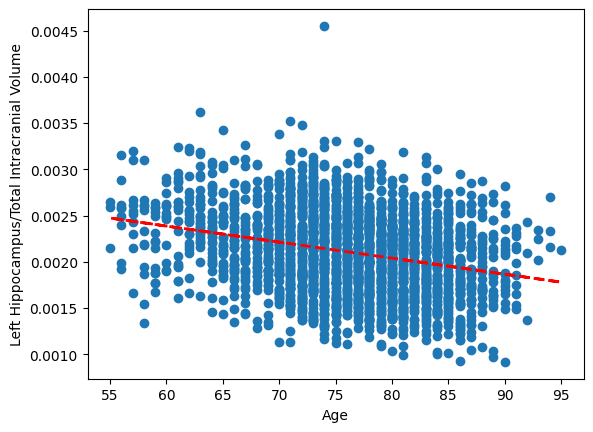

In [17]:
dataset = pd.read_csv(DATASET)
age = dataset['Age']
ratio = dataset['LHC_ICV']
corrS, _ = spearmanr(age,ratio)
corrP, _ = pearsonr(age,ratio)
print("Spearman Correlation:",corrS)
print("Pearson Correlation:",corrP)
a,b = np.polyfit(age,ratio,1)
plt.scatter(dataset['Age'], dataset['LHC_ICV'])
plt.plot(age,a*age+b, color='red', linestyle='--', linewidth=2)
plt.xlabel("Age")
plt.ylabel("Left Hippocampus/Total Intracranial Volume")
plt.show()